<a href="https://colab.research.google.com/github/mateusfgomes/calcnumerico/blob/main/metodos_diretos_iterativos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###**Solução de Sistemas Lineares: métodos diretos e métodos iterativos**

<br>

###**Métodos diretos**

Ao se aplicar um método direto sobre um problema, obtem-se a resposta sem aproximações (sem considerar aquelas causadas pela utilização do ponto flutuante da máquina) do que se deseja. Em outras palavras, o sistema programado utiliza de métodos aplicados comumente, como a "Eliminação de Gauss" para encontrar as raízes de um problema.

Alternativas mais recorrentes de resolução por métodos diretos são: Eliminação de Gauss, Decomposição LU e Decomposição de Cholesky

<br>

####**Decomposição LU** 

O processo de decomposição LU consiste na transformação da matriz $A$, fazendo com que tenhamos:

><center>$A = L.U$

Dessa forma, poderemos reescrever a igualdade $Ax = b$ como $LUx = b$ e utilizar tal decomposição da matriz $A$ para encontrar as raízes do sistema.
Para isso, se fizermos a decomposição em $L \in A$ dada matriz $A \in M(n,n)$, teremos


><center>$L=\begin{bmatrix}1 & 0 & 0 & ... & 0\\
l_{22} & 1 & 0 & ... & 0\\
l_{31} & l_{32} & 1 & ... & 0\\
...    &  ...   &  ...   & ... & ... \\
l_{n1} & l_{n2} & l_{n3} & ... & 1\\
\end{bmatrix}$

><center>$U=\begin{bmatrix}u_{11} & u_{12} & u_{13} & ... & u_{1n}\\
0 & u_{22} & u_{23} & ... & u_{2n}\\
0 & 0 & u_{33} & ... & u_{3n}\\
...    &  ...   &  ...   & ... & ... \\
0 & 0 & 0 & ... & u_{nn}\\
\end{bmatrix}$

Para fazer isso, podemos usar de vários métodos, tais como a Eliminação de Gauss e o Método de Doolittle.

<br>

**Método de Doolittle para Decomposição LU**

No 1º Passo a primeira linha de u é igual a primeira linha de a. Para obter a primeira coluna de l, dividimos a primeira linha de a pelo primeiro elemento de u:

><center>$u_{1j} = a_{1j}\\
l_{i1} = a_{i1}/u_{11}$


A seguir, para a segunda linha de u e segunda coluna de l:

><center>$u_{2j} = a_{2j} - l_{21}u_{1j}\\
l_{i2} = \frac{a_{i2} - u_{12}l_{i1}}{u_{22}}$


Para generalizar, temos u e l:


><center>$u_{ij} = a_{ij} - \sum^{i-1}_{k=1} u_{kj}l_{ik}\\
l_{ij} = \frac{a_{ij} - \sum^{j-1}_{k=1} u_{kj}l_{ik}}{u_{jj}}$

À primeira vista, tal generalização parece complexa de ser compreendida, porém, basta um pouco mais de atenção para perceber que $l_{ij}$ realiza o mesmo procedimento de $u_{ij}$ com a diferença de que se preenchem as colunas. ao invés das linhas, como em u, e os valores são divididos por $u_{jj}$

<br>

**Utilização da Decomposição LU para resolução de Sistemas Lineares**

É possível usar a Decomposição LU para resolução de sistemas lineares, se isso for necessário, como dito acima, ao fazer $LUx = b$ tomamos $y = Ux$ e, assim, como temos $Ly = b$  com L sendo triangular inferior (o que faz o sistema facilmente calculavel) encontramos os valores de $y$ e, em seguida, os substituimos em $y = Ux$, encontrando os valores de $x$ desejados. 

<br>

###**Implementação da Decomposição LU**


In [ ]:
import numpy as np
import sympy

def decompLU(A):
	L = np.eye(np.shape(A)[0]) #matriz L com a dimensao de A com a diagonal principla igual a 1
	U = np.zeros(np.shape(A)) #matriz U full zero
	lim = np.shape(A)[1] #pegando o tamanho da coluna de A (matriz quadrada)	
	sum = 0	

	for i in range(0, lim):
		for j in range(0, lim):
			sum = 0
			#Parte do somatorio de U que vai de 0 a i-1 e acumula L[i][k]*U[k][j] sendo k a variavel iteradora
			for k in range (0, i):
				sum += L[i,k]*U[k,j]
			U[i,j] = A[i,j] - sum #atribuindo o valor de U[i][j]

		for j in range (0, lim):
			sum = 0
			#Parte do somatorio de L que vai de 0 a i-1 e acumula L[j][k]*U[k][i] sendo k a variavel iteradora
			for k in range (0, i):
				sum+= L[j,k]*U[k,i]
			L[j,i] = (A[j,i] - sum)/U[i,i] #atribuindo o valor L[i][j]
	
	return L, U #retornando o resultado

def solveLU(L, U, b):
	#Resolvendo o sistema A*x = b
	#Como A = L*U, entao (L*U)*x = b
	#Vamos fazer L*(U*x) = b e U*x=y, portanto L*y=b
	#Logo, para encontrarmos o resultado resolvemos o sistema U*x = y 

	y = np.zeros(np.shape(b)) #matriz coluna y com a mesma dimensao de b 
	x = np.zeros(np.shape(b)) #matriz coluna x (resultado do sistema) com a mesma dimensao de b		
	
	for i in range (0, np.shape(b)[0]): #resolvendo o sistema  L*y=b
		for j in range (0,i):
			y[i] -= y[j]*L[i,j]
		y[i]+=b[i]					

	for i in range (np.shape(b)[0]-1, -1, -1): #resolvendo o sistema U*x=b
		for j in range (np.shape(b)[0]-1, i, -1):
			x[i] -= x[j]*U[i,j]
		x[i]+=y[i]
		x[i]/=U[i,i]

	return x #retornando o resultado				




####**Decomposição de Cholesky**

O objetivo da decomposição de Cholesky é separar a matriz principal em um produto de duas matrizes, sendo uma delas comum e a outra a transposta dessa comum.

><center> $A = H.H^T$

Sendo H uma matriz do tipo:

><center>$H=\begin{bmatrix}h_{11} & 0 & 0 & ... & 0\\
h_{21} & h_{22} & 0 & ... & 0\\
h_{31} & h_{32} & h_{33} & ... & 0\\
...    &  ...   &  ...   & ... & ... \\
h_{n1} & h_{n2} & h_{n3} & ... & h_{nn}\\
\end{bmatrix}$

e $h_{ii} > 0, i=1,...,n.$

<br>

Para calcular os termos da diagonal:

<br>

><center>$h_{ii} = \sqrt{a_{ii} - \sum^{i-1}_{k=1}h^{2}_{ik}}$

<br>

Para calcular os termos fora da diagonal:

><center>$h_{ij} = \frac{a_{ij} - \sum^{j-1}_{k=1}h_{ik}h_{jk}}{h_{jj}}$

<br>

###**Implementação da Decomposição de Cholesky**


In [ ]:
import numpy as np
import scipy 
import scipy.linalg 

def choleskydecomp(A):

    n = np.shape(A)[0]
    h = np.tril(A)

    for i in range(n-1):
        if h[i,i] <= 0:
            return -1 #Valor negativo ou 0 na diagonal principal, retorna
        h[i,i] = np.sqrt(h[i,i])
        h[i+1:n,i] = h[i+1:n,i]/h[i,i]
        for j in range(i+1, n):
            h[j:n,j] = h[j:n,j] - h[j:n,i]*h[j,i]

    h[n-1,n-1] = np.sqrt(h[n-1,n-1])

    return h







####**Eliminação de Gauss** 

O processo desenvolvido na Eliminação de Gauss, também muito conhecido como método de escalonamento, consiste em, primeiramente, utilizarmos uma matriz aumentada de **A**x = **b**, tendo em vista que todas as matrizes quadradas menores presentes dentro de A (cujo ultimo elemento é A<sub>ii</sub>) tenham $det(A_{k}) \neq$ 0, dessa forma, precisamos de:

> <center>$\begin{bmatrix}A & | & b\\ 
\end{bmatrix}$

Assim, montamos uma matriz, do tipo: 

><center>$\begin{bmatrix}\color{#D0AF00}a_\color{#D0AF00}{11} & a_{12} & a_{13} & ... & a_{1n} & b_{1}\\
a_{21} & \color{#D0AF00}a_\color{#D0AF00}{22} & a_{23} & ... & a_{2n} & b_{2}\\
a_{31} & a_{32} & \color{#D0AF00}a_\color{#D0AF00}{33} & ... & a_{3n} & b_{3}\\
...    &  ...   &  ...   & ... & ...    & ...  \\
a_{n1} & a_{n2} & a_{n3} & ... & a_{nn} & b_{n}\\
\end{bmatrix}$

<br>

Utilizando um pivô escolhido na diagonal principal do sistema de equações (com tal "pivô" diferente de 0) para obter as raízes desse sistema, se divide o elemento inferior pelo pivô com o objetivo de zerar os elementos abaixo dele, no caso apresentado, fazendo para o primeiro elemento, teremos:

><center>$a_{21}/a_{11}$


Multiplicando-se a linha do pivo e somando na linha abaixo, zeraremos o primeiro elemento, obtendo:

><center>$\begin{bmatrix}\color{#D0AF00}a_\color{#D0AF00}{11} & a_{12} & a_{13} & ... & a_{1n} & b_{1}\\
0 & \color{#D0AF00}a_\color{#D0AF00}{22} & a_{23} & ... & a_{2n} & b_{2}\\
a_{31} & a_{32} & \color{#D0AF00}a_\color{#D0AF00}{33} & ... & a_{3n} & b_{3}\\
...    &  ...   &  ...   & ... & ...    & ...  \\
a_{n1} & a_{n2} & a_{n3} & ... & a_{nn} & b_{n}\\
\end{bmatrix}$

O processo se repete de forma fazer com que uma matriz triangular inferior de zeros seja construída:

><center>$\begin{bmatrix}\color{#D0AF00}a_\color{#D0AF00}{11} & a_{12} & a_{13} & ... & a_{1n} & b_{1}\\
0 & \color{#D0AF00}a_\color{#D0AF00}{22} & a_{23} & ... & a_{2n} & b_{2}\\
0 & 0 & \color{#D0AF00}a_\color{#D0AF00}{33} & ... & a_{3n} & b_{3}\\
...    &  ...   &  ...   & ... & ...    & ...  \\
0 & 0 & 0 & ... & a_{nn} & b_{n}\\
\end{bmatrix}$

<br>

#####**Implementação da Eliminação de Gauss** - Sem Pivoteamento Parcial

O processo de pivoteamento parcial serve para que as equações sejam mudadas de posição, como é permitido, caso um dos elementos da diagonal principal seja zero

In [ ]:
def sub_regressiva(U,y):
    # U é matriz triangular superior
    # y é o lado direito
    # retornaremos a solução
    n = np.shape(y)[0]
    x = np.zeros(n)
    for i in np.arange(n-1,-1,-1): # limite superior:último índice (menor) -1:-1 (step é decremento) --> 4:2:-1 percorre 4 e 3.
        x[i] = (y[i]-U[i,i+1:n].dot(x[i+1:n]))/U[i,i]

    return x


"""Eliminação de Gauss sem Pivoteamento"""

def eliminacao_gauss_pivo(A,b):
    # Não tem que definir matrizes auxiliares
    n = np.shape(A)[0]
    newA = np.copy(A)
    newb = np.copy(b)
    for k in np.arange(n-1):
        for i in np.arange(k+1,n):
            m = -newA[i,k]/newA[k,k]
            newA[i,k:n] = newA[i,k:n] + m*newA[k,k:n]
            newb[i] = newb[i] + m*newb[k]
    return sub_regressiva(newA, newb)

###**Comparação dos Métodos Diretos: Eliminação de Gauss x Decomposição LU**

<br>

Foram aplicados dois métodos para solução de sistemas lineares com matrizes SPDs. O desempenho da Eliminação de Gauss se mostra bem superior ao da Decomposição LU para matrizes arbitrariamente grandes, esse tipo de ocorrido pode se dar por motivos como o fato de LU calcular duas matrizes para resolver o problema. Considerando que apenas uma das matrizes será utilizada para resolução do problema (L com substituição progressiva e U com substituição regressiva), há um certo desperdício de memória pelo "descarte" da outra.<br>
<br>
Além disso, é necessário avaliar também que há um certo tempo para que essa outra matriz descartada. Dessa forma, como o método do escalonamento calcula apenas uma das matrizes - nesse caso, igual a matriz U - há uma economia do espaço e uma solução bem mais eficiente.

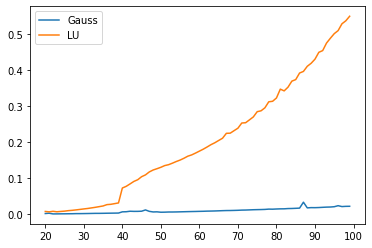

In [ ]:
import numpy as np
import sympy
import scipy
import time as t
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt


n = 20
count = 0
lu_y = np.zeros(100)
lu_x = np.zeros(100)
gauss_y = np.zeros(100)
gauss_x = np.zeros(100)

#Executando 5 casos
while(n <= 100):
    A = sklearn.datasets.make_spd_matrix(n)
    b = 2*np.random.random_sample(n)
    #print("=======TAMANHO DAS MATRIZES A E B=======\n")
    #print("Matriz A: ", n, "x", n) 
    #print("B: ", n)
    #print("\n")

    #print("=======DECOMPOSICAO LU IMPLEMENTADA=======")
    start_time = t.time()
    (L, U) = decompLU(A)
    solveLU(L, U, b)
    end_time = t.time()
    #print("Tempo para realizar a Decomposicao LU implementada: %s segundos ---\n" % (end_time - start_time))

    lu_y[count] = end_time - start_time

    ##Eliminação de Gauss
    #print("=======ELIMINACAO DE GAUSS=======")
    start_time = t.time()
    eliminacao_gauss_pivo(A,b)
    end_time = t.time()
    #print("Eliminacao de Gauss: %s segundos ---\n" % (end_time - start_time))

    gauss_y[count] = end_time - start_time
    
    gauss_x[count] = n
    lu_x[count] = n
    n += 1
    count+=1
    

plt.plot(gauss_x[0:80], gauss_y[0:80], lu_x[0:80], lu_y[0:80])
plt.legend(['Gauss', 'LU'], loc='best')




###**Adicionando a solução da própria biblioteca NumPy**

Adicionando à comparação a função np.linalg.solve da biblioteca que já está implementada, e com ela é possível perceber que há uma certa proximidade entre a velocidade dessa função e a Eliminação de Gauss implementada, porém, como as funções das bibliotecas possuem um certa otimização é compreensível que haja um desvio

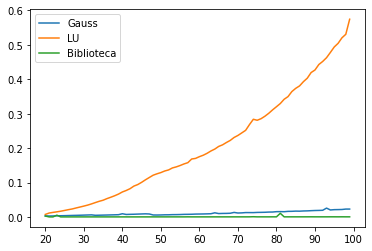

In [ ]:
import numpy as np
import sympy
import scipy
import time as t
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt


n = 20
count = 0
lu_y = np.zeros(100)
lu_x = np.zeros(100)
gauss_y = np.zeros(100)
gauss_x = np.zeros(100)
biblio_y = np.zeros(100)
biblio_x = np.zeros(100)

#Executando 100 casos
while(n <= 100):
    A = sklearn.datasets.make_spd_matrix(n)
    b = 2*np.random.random_sample(n)
    #print("=======TAMANHO DAS MATRIZES A E B=======\n")
    #print("Matriz A: ", n, "x", n) 
    #print("B: ", n)
    #print("\n")

    #print("=======DECOMPOSICAO LU IMPLEMENTADA=======")
    start_time = t.time()
    (L, U) = decompLU(A)
    solveLU(L, U, b)
    end_time = t.time()
    #print("Tempo para realizar a Decomposicao LU implementada: %s segundos ---\n" % (end_time - start_time))

    lu_y[count] = end_time - start_time

    ##Eliminação de Gauss
    #print("=======ELIMINACAO DE GAUSS=======")
    start_time = t.time()
    eliminacao_gauss_pivo(A,b)
    end_time = t.time()
    #print("Eliminacao de Gauss: %s segundos ---\n" % (end_time - start_time))

    gauss_y[count] = end_time - start_time
    
    start_time = t.time()
    np.linalg.solve(A,b)
    end_time = t.time()

    biblio_y[count] = end_time - start_time

    biblio_x[count] = n
    gauss_x[count] = n
    lu_x[count] = n
    n += 1
    count+=1
    
plt.plot(gauss_x[0:80], gauss_y[0:80], lu_x[0:80], lu_y[0:80], biblio_x[0:80], biblio_y[0:80])
plt.legend(['Gauss', 'LU', 'Biblioteca'], loc='best')




###**Métodos iterativos: Método de Gauss-Jacobi e de Gauss-Seidel**

<br>

####**Gauss - Jacobi**

<br>

O método de Gauss-Jacobi é um método interativo "não-exato" que aproxima-se de uma solução, esse consiste na inserção de um vetor de valores aleatórios como "chute" para que o método calcule iterativamente a solução a partir daquele chute. O funcionamento do método é descrito da seguinte maneira:<br>
Primeiramente, isola-se os elementos da diagonal principal do sistema $Ax = b$ dividindo por eles em ambos os lados de cada equação, supondo assim que $a_{ii} \neq 0$, a seguir, zeramos a diagonal principal da matriz $A$. Assim temos o seguinte sistema de equações e a respectiva matriz:

><center>$\begin{cases}
a_{11}x_{1} + a_{12}x_{2} − · · · − a_{1n}x_{n} = b_{1} \\
a_{21}x_{1} + a_{22}x_{2} − · · · − a_{1n}x_{n} = b_{2} \\
a_{31}x_{1} + a_{32}x_{2} − · · · − a_{1n}x_{n} = b_{3} \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ ... \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ ... \\
a_{n1}x_{1} + a_{n2}x_{3} − · · · − a_{nn}x_{n} = b_{n} \\
\end{cases}$

Isolando:
<br>

><center>$\begin{cases}
x_{1} =  (b_{1} − a_{12}x_{2} − a_{13}x_{3} − · · · − a_{1n}x_{n})/a_{11} \\
x_{2} = (b_{2} − a_{21}x_{1} − a_{23}x_{3} − · · · − a_{2n}x_{n})/a_{22} \\
x_{3} = (b_{3} − a_{31}x_{1} − a_{32}x_{2} − · · · − a_{3n}x_{n})/a_{33} \\
... \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ ... \\
x_{n} = (b_{n} − a_{n1}x_{1} − a_{n2}x_{2} − · · · − a_{n,n-1}x_{n-1})/a_{nn} \\
\end{cases}$

Equivalente às matrizes abaixo:
<br>

><center>$\begin{bmatrix}0 & -a_{12}/a_{11} & -a_{13}/a_{11} & ... & -a_{1n}/a_{11} \\
-a_{21}/a_{22} & 0 & -a_{23}/a_{22} & ... & -a_{2n}/a_{22} \\
-a_{31}/a_{33} & -a_{32}/a_{33} & 0 & ... & -a_{3n}/a_{33} \\
...    &  ...   &  ...   & ... & ... \\
-a_{n1}/a_{nn} & -a_{n2}/a_{nn} & -a_{n,n-1}/a_{nn} & ... & 0 \\
\end{bmatrix}$

<br>

><center>$\begin{bmatrix}b_{1}/a_{11} \\
b_{2}/a_{22} \\
b_{3}/a_{33} \\
... \\
b_{n}/a_{nn} \\
\end{bmatrix}$

Com isso, no sistema, os valores do chute convergem para a solução ao longo das iterações, sendo $n$ representando as iterações:

><center>$\begin{cases}
x_{1}^{(n+1)} =  (b_{1} − a_{12}x_{2}^{(n)} − a_{13}x^{(n)}_{3} − · · · − a_{1n}x^{(n)}_{n})/a_{11} \\
x_{2}^{(n+1)} = (b_{2} − a_{21}x_{1}^{(n)} − a_{23}x^{(n)}_{3} − · · · − a_{2n}x^{(n)}_{n})/a_{22} \\
x_{3}^{(n+1)} = (b_{3} − a_{31}x_{1}^{(n)} − a_{32}x^{(n)}_{2} − · · · − a_{3n}x^{(n)}_{n})/a_{33} \\
... \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ ... \\
x_{n}^{(n+1)} = (b_{n} − a_{n1}x_{1}^{(n)} − a_{n2}x^{(n)}_{2} − · · · − a_{n,n-1}x^{(n)}_{n-1})/a_{nn} \\
\end{cases}$

###**Convergência do Método**

O método converge quando se obedece ao critério das colunas ou ao das linhas. Tais critérios são dados por, para $1\le k \le n$:<br><br>
Linhas:
><center>$\alpha = max\{\alpha_k\} < 1,$ com $\alpha_k=\frac{\sum^n_{j=1\\j \neq k}|a_{kj}|}{|a_{kk}|}$<br><br>

Colunas:
><center>$\alpha = max\{\alpha_k\} < 1,$ com $\alpha_k=\frac{\sum^n_{i=1\\i \neq k}|a_{ik}|}{|a_{kk}|}$<br><br>







In [ ]:
import numpy as np

#N eh o 'infinito'
#x eh o chute inicial
def jacobi(A, b, N, x, erro):                                                                                                                                                        

    n = np.shape(A)[0]
    flag = 0

    #teste das linhas
    tA = np.copy(A)
    np.fill_diagonal(tA, 0)
    for i in range(n):
        sum = np.sum(np.abs(tA[i]))
        #print(sum, A[i][i])
        div1 = sum/np.abs(A[i][i])
        #print(div)
        if div1 >= 1:
            #print("Nao atende ao criterio das colunas, alpha(k) = ", div)
            flag = 1
    #

    if flag == 1:
        #teste das colunas
        for i in range(n):
            sum = 0
            for j in range(n):
                sum += np.abs(tA[j][i])
                #print(sum, A[i][i])
            div2 = sum/np.abs(A[i][i])
            if div2 >= 1:
                print("Nao atende ao criterio, alpha(k) = ", div1, " e ", div2, " n: ", n)
                return -1, -1
        #

    D = np.zeros((n,n))
    for i in range(n):
        D[i,i] = A[i,i]

    D_inv = np.linalg.inv(D)
    I = np.eye(n)

    C = I - np.dot(D_inv, A)
    g = np.dot(D_inv, b)

    count = 0

    while count < N and abs(np.linalg.norm(b-np.dot(A, x))) > erro:
        x = np.dot(C,x) + g
        count+=1

    if count == N:
        return count,x

    return count, x






####**Gauss - Seidel**

<br>

O método de Gauss-Seidel funciona analogamente ao método de Gauss-Jacobi, porém com a diferença de que, nele, há uma grande redução no número de iterações necessárias para atingir o objetivo de aproximar-se às raízes. Em Gauss-Jacobi, primeiramente, iriam se substituir todos os valores do chute na iteração 0 para encontrar todos os da iteração 1, e assim por diante.
Já em Gauss-Seidel, o algoritmo funciona substituindo os valores e, ao longo das iterações, os novos valores obtidos em iterações anterioes já são substituidos, não necessecitando dos valores antigos. 

Dessa forma, as iterações são dadas pelo seguinte, sendo $n$ a iteração:

<br> 

><center>$\begin{cases}
x_{1}^{(n+1)} =  (b_{1} − a_{12}x_{2}^{(n)} − a_{13}x^{(n)}_{3} − · · · − a_{1n}x^{(n)}_{n})/a_{11} \\
x_{2}^{(n+1)} = (b_{2} − a_{21}x_{1}^{(n+1)} − a_{23}x^{(n)}_{3} − · · · − a_{2n}x^{(n)}_{n})/a_{22} \\
x_{3}^{(n+1)} = (b_{3} − a_{31}x_{1}^{(n+1)} − a_{32}x^{(n+1)}_{2} − · · · − a_{3n}x^{(n)}_{n})/a_{33} \\
... \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ ... \\
x_{n}^{(n+1)} = (b_{n} − a_{n1}x_{1}^{(n+1)} − a_{n2}x^{(n+1)}_{2} − · · · − a_{n,n-1}x^{(n+1)}_{n-1})/a_{nn} \\
\end{cases}$

In [ ]:

    
def seidel(a, b, n, x, erro):

    l = np.tril(a)
    r = a - l

    c = (np.dot(-np.linalg.inv(l), r))
    g = np.dot(np.linalg.inv(l), b)
    count = 0
    while count < n and abs(np.linalg.norm(b-np.dot(a, x))) > erro:
        x = np.dot(c, x) + g
        count+=1

    if(count == n):
        return count, x
    
    return count, x

###**Comparação entre o Método Iterativo (Gauss-Seidel) e Método Direto (Eliminação Gaussiana)**

Foram comparados três métodos, Eliminação Gaussiana, Gauss-Seidel para 5 casas decimais, Gauss-Seidel para 2 casas decimais. Nessa situação, a Eliminação Gaussiana obteve o melhor desempenho em matrizes arbitrariamente grandes válidas geradas randomicamente (maiores que 200x200).<br>
O método de Gauss-Seidel teve como entrada matrizes aleatórias e tem a vantagem de ocupar menos espaço, quando comparado a Eliminação Gaussiana. Porém, tal método fornece uma aproximação até a quinta casa decimal, quando se reduz a aproximação para duas casas decimais, o método se torna mais rápido que o escalonamento para matrizes de dimensão de até 200x200.
O gráfico foi construido colocando o tempo de execução em função do tamanho das matrizes


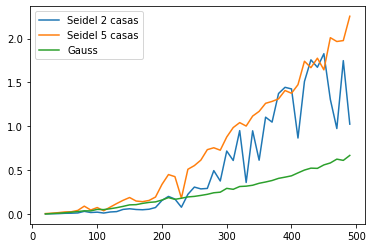

In [ ]:
import time as t
import numpy as np
import scipy
import sklearn
from sklearn import datasets

def testegaussiana(B,g):
    #Testando o tempo gasto pelo método direto - Eliminação Gaussiana
    x = eliminacao_gauss_pivo(B,g)


def testeseidel_5(B,g,x):
    #Testando o tempo gasto pelos métodos iterativos - Método de Gauss-Seidel
    (it,ans) = seidel(B, g, 10000, x, 10E-5)
    

def testeseidel_2(B,g,x):
    #Testando o tempo gasto pelos métodos iterativos - Método de Gauss-Seidel
    (it,ans) = seidel(B, g, 10000, x, 10E-2)
    


#Gerando objetos necessários para os testes

n = 20
count = 0
gauss_y = np.zeros(50)
gauss_x = np.zeros(50)

seidel_5_y = np.zeros(50)
seidel_5_x = np.zeros(50)

seidel_2_y = np.zeros(50)
seidel_2_x = np.zeros(50)

#Executando 500 casos
while(n <= 500):
    A = sklearn.datasets.make_spd_matrix(n)
    b = 2*np.random.random_sample(n)
    x = np.zeros(n)


    #print("=======TAMANHO DAS MATRIZES A E B=======\n")
    #print("Matriz A: ", n, "x", n) 
    #print("B: ", n)
    #print("\n")

    #print("=======DECOMPOSICAO LU IMPLEMENTADA=======")
    start_time = t.time()
    testegaussiana(A,b)
    end_time = t.time()
    #print("Tempo para realizar a Decomposicao LU implementada: %s segundos ---\n" % (end_time - start_time))

    gauss_y[count] = end_time - start_time


    l = np.tril(A)
    r = A - l
    l_inv = np.linalg.inv(l)
    c = (np.dot(-l_inv, r))
    d = np.dot(l_inv, b)
    
    start_time = t.time()
    testeseidel_5(A,b,x)
    end_time = t.time()


    seidel_5_y[count] = end_time - start_time

    start_time = t.time()
    testeseidel_2(A,b,x)
    end_time = t.time()

    seidel_2_y[count] = end_time - start_time


    seidel_2_x[count] = n
    seidel_5_x[count] = n
    gauss_x[count] = n

    n += 10
    count += 1




plt.plot(seidel_2_x[0:48], seidel_2_y[0:48], seidel_5_x[0:48], seidel_5_y[0:48], gauss_x[0:48], gauss_y[0:48])
plt.legend(['Seidel 2 casas', 'Seidel 5 casas', 'Gauss'], loc='best')






###**Comparação entre os Métodos Iterativos: Método de Gauss-Jacobi e Gauss-Seidel**

Como o método de Gauss-Jacobi necessita de um conjunto diferente de matrizes para rodar, a comparação a ser feita utilizando tal método dará-se a partir da contagem do número de iterações que cada um deles realizará.<br>
É possível observar que o Método de Seidel encontra as raízes num número de iterações bem menor, e essa é a vantagem de Gauss-Seidel. Porém, pelo fato de depender da solução das equações anteriores, ele não pode ser paralelizável, diferente do que ocorre com Gauss-Jacobi.

In [ ]:
def testejacobi(B,g,x):
    #Testando o tempo gasto pelos métodos iterativos - Método de Gauss-Jacobi
     #print("=========== METODOS ITERATIVOS =============")
    (it,ans) = jacobi(B, g, 10000, x, 10E-5)
    print("Numero de iteracoes utilizada pelo metodo de Jacobi: ", it)
    print("Raizes encontradas por jacobi: ", ans, "\n")


def testeseidel_5(B,g,x):
    #Testando o tempo gasto pelos métodos iterativos - Método de Gauss-Seidel

    (it,ans) = seidel(B, g, 10000, x, 10E-5)
    print("Numero de iteracoes utilizada pelo metodo de Seidel: ", it)
    print("Raizes encontradas por seidel: ", ans, "\n")


print("============================")

A = np.array([[10, 2, 1], [1, 5, 1], [2, 3, 10]], dtype='double')
b = np.array([7, -8, 6])
x = np.array([0.7,-1.6, 0.6])

testejacobi(A, b, x)
testeseidel_5(A, b, x)
print("Solucao da biblioteca: ", np.linalg.solve(A, b))

print("============================")

A = np.array([[5, 2, 1], [1, 4, 1], [2, 3, 6]], dtype='double')
b = np.array([7, -8, 6])
x = np.array([0.7,-1.6, 0.6])

testejacobi(A, b, x)
testeseidel_5(A, b, x)
print("Solucao da biblioteca: ", np.linalg.solve(A, b))

print("============================")

A = np.array([[25, 12, 4], [5, 20, 13], [12, 16, 32]], dtype='double')
b = np.array([7, -8, 6])
x = np.array([0.7,-1.6, 0.6])

testejacobi(A, b, x)
testeseidel_5(A, b, x)
print("Solucao da biblioteca: ", np.linalg.solve(A, b))

print("============================")


Numero de iteracoes utilizada pelo metodo de Jacobi:  11
Raizes encontradas por jacobi:  [ 1.00000168 -1.99999769  1.00000243] 

Numero de iteracoes utilizada pelo metodo de Seidel:  5
Raizes encontradas por seidel:  [ 1.000007   -2.00000586  1.00000036] 

Solucao da biblioteca:  [ 1. -2.  1.]
Numero de iteracoes utilizada pelo metodo de Jacobi:  22
Raizes encontradas por jacobi:  [ 2.24999436 -3.00000516  1.74999282] 

Numero de iteracoes utilizada pelo metodo de Seidel:  8
Raizes encontradas por seidel:  [ 2.25000294 -2.99999881  1.74999843] 

Solucao da biblioteca:  [ 2.25 -3.    1.75]
Numero de iteracoes utilizada pelo metodo de Jacobi:  61
Raizes encontradas por jacobi:  [ 0.59731101 -0.77867766  0.3528492 ] 

Numero de iteracoes utilizada pelo metodo de Seidel:  12
Raizes encontradas por seidel:  [ 0.59730909 -0.77867671  0.35284744] 

Solucao da biblioteca:  [ 0.59731013 -0.7786788   0.3528481 ]
